# Uber Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Data_Analysis\Projects\Uber\ncr_ride_bookings.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,3/23/2024,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/29/2024,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,8/23/2024,8:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,10/21/2024,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,9/16/2024,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

### Clean Up the data

##### Task-1: Convert the date and time from object to date-time format

In [4]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce') # errors='coerce' → Converts any unrecognized date string to NaT (no crash).

In [5]:
# Convert Time to datetime.time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors = 'coerce').dt.time

#####  Task-2: Extract features from Date and Time

In [6]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

In [7]:
df['Hour'] = pd.to_datetime(df['Time'], format = '%H:%M:%S', errors = 'coerce').dt.hour

##### Task-3: Handle Categorical Nulls

In [8]:
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna('Not Applicable')

In [9]:
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna('Not Applicable')

In [10]:
df['Payment Method'] = df['Payment Method'].fillna('Not Applicable')

##### Task-4: Handle Numerical Nulls (Counts)

In [11]:
# Replace cancellations & incomplete rides with 0 (if null)
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'].fillna(0)
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0)
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0)

In [12]:
df['Booking Value'] = df['Booking Value'].fillna(0)

In [13]:
df['Customer Rating'] = df['Customer Rating'].fillna(0)

In [14]:
df['Driver Ratings'] = df['Driver Ratings'].fillna(0)

In [54]:
df['Ride Distance'] = df['Ride Distance'].fillna(0)

## 1. Ride Volume & Demand Patterns

####  Monthly trend: number of rides booked over time.

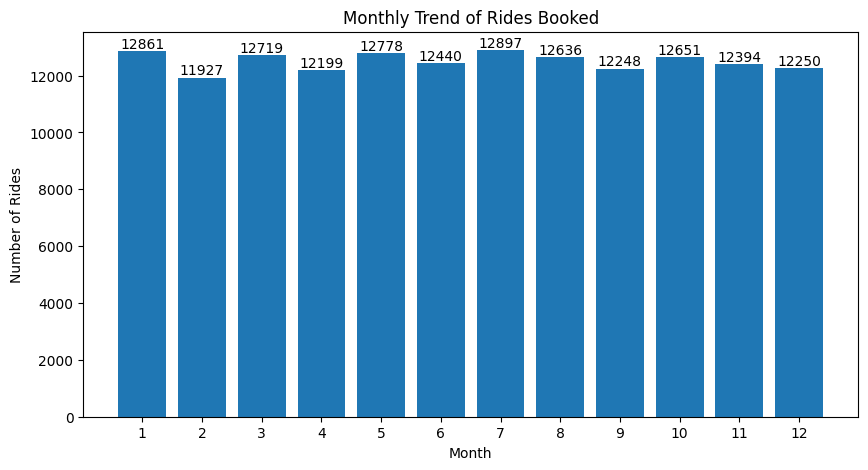

In [242]:
monthly_rides = df.groupby('Month').size().reset_index(name='Number of Rides')

plt.figure(figsize=(10,5))
bars = plt.bar(monthly_rides['Month'], monthly_rides['Number of Rides'])
plt.title("Monthly Trend of Rides Booked")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(monthly_rides['Month'])
plt.bar_label(bars)
plt.show()

Based on the Monthly Trend of Rides Booked, the number of rides remained relatively stable throughout the year, consistently ranging between approximately 11,900 and 12,900. The peak month for rides booked was January (12,861 rides), with other high-activity months being July and August. The lowest number of rides occurred in the month of February(11,927 rides).


##### Time of day trends: Peak demand hours (rush hour, late night).

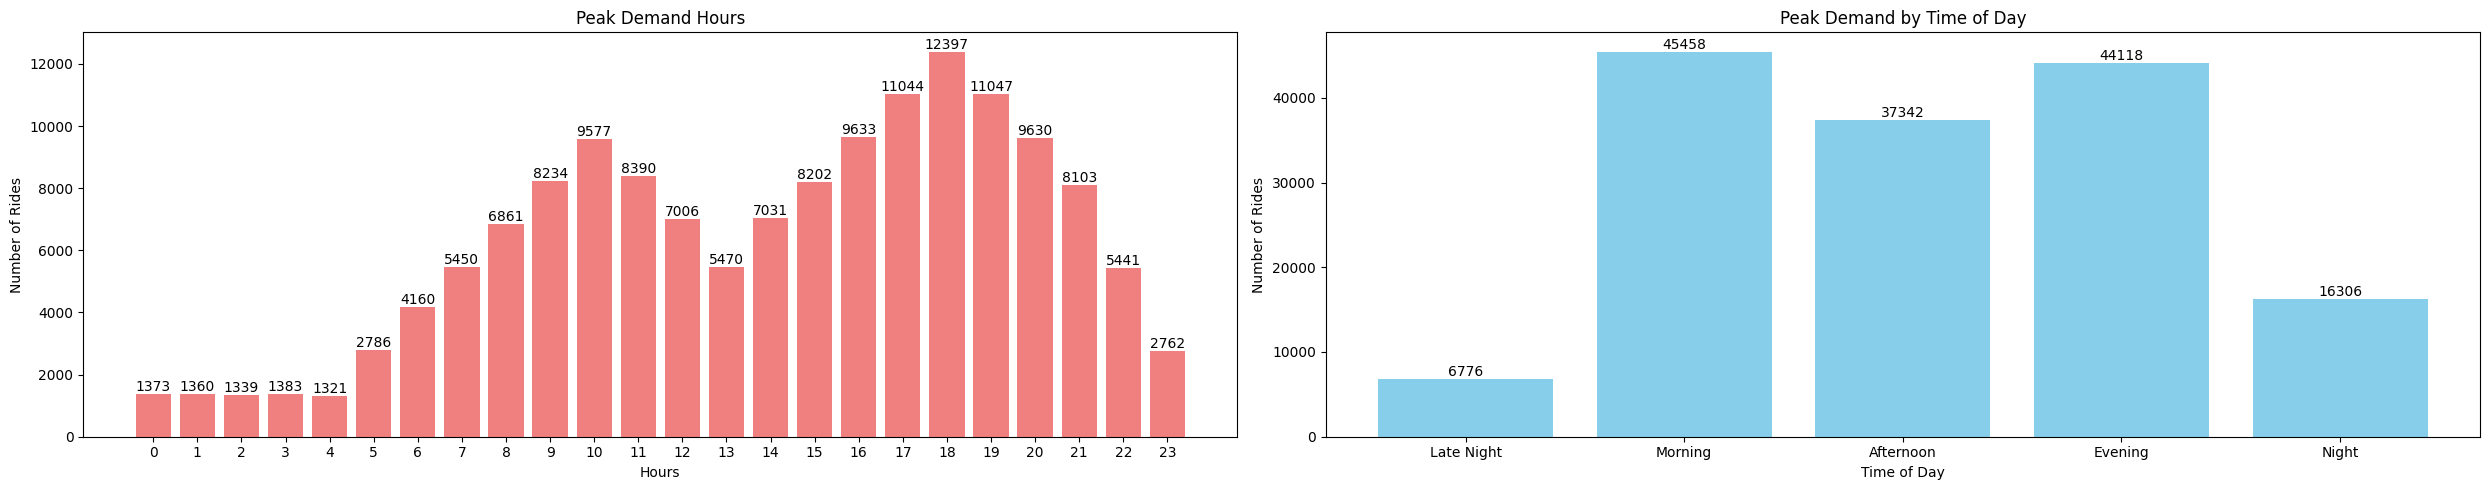

In [21]:
hourly_rides = df.groupby('Hour').size().reset_index(name = 'Number of rides')

fig, axes = plt.subplots(1, 2, figsize=(25, 5))  # 1 row, 2 columns

# --- First plot: Hourly rides ---
bars1 = axes[0].bar(hourly_rides['Hour'], hourly_rides['Number of rides'], color='lightcoral')
axes[0].set_title('Peak Demand Hours')
axes[0].set_xlabel('Hours')
axes[0].set_ylabel('Number of Rides')
axes[0].set_xticks(hourly_rides['Hour'])
axes[0].bar_label(bars1)


def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Night'
    else:
        return 'Late Night'

# Create a new column with the time of day
df['Time_of_Day'] = df['Hour'].apply(get_time_of_day)

# Group by the new column
time_rides = df.groupby('Time_of_Day').size().reset_index(name='Number of Rides')

# Ensure proper order
order = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
time_rides['Time_of_Day'] = pd.Categorical(time_rides['Time_of_Day'], categories=order, ordered=True)
time_rides = time_rides.sort_values('Time_of_Day')

# --- Second plot: Time of Day rides ---
bars2 = axes[1].bar(time_rides['Time_of_Day'], time_rides['Number of Rides'], color='skyblue')
axes[1].set_title('Peak Demand by Time of Day')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Number of Rides')
axes[1].bar_label(bars2)

plt.tight_layout()
plt.show()


The highest demand for rides occurs during the Morning - 5-12 AM (45,458 rides) and Evening - 5-9 PM (44,118 rides) periods, which typically correspond to Office commute times. 
Specifically, the hourly data shows a significant surge in rides during the evening peak, with demand highest peaking at 6 PM (hour with 12,393 rides.
This pattern can be leveraged to optimize driver allocation and surge pricing strategies.

##### Demand: Weekday vs Weekend

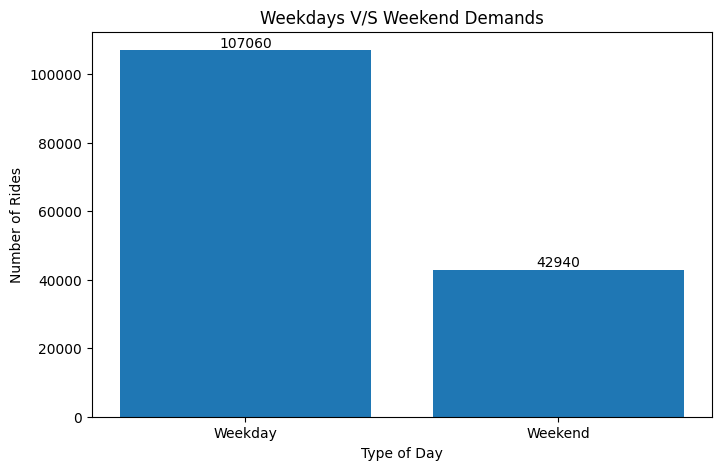

In [244]:
def get_weekend(week_day):
    if week_day == 'Saturday' or week_day == 'Sunday':
        return 'Weekend'
    else:
        return 'Weekday'

df['Type of Day'] = df['Weekday'].apply(get_weekend)

type_of_day = df.groupby('Type of Day').size().reset_index(name='Number of Rides')

plt.figure(figsize=(8,5))
bars = plt.bar(type_of_day['Type of Day'], type_of_day['Number of Rides'])
plt.title("Weekdays V/S Weekend Demands")
plt.xlabel("Type of Day")
plt.ylabel("Number of Rides")
plt.xticks(type_of_day['Type of Day'])
plt.bar_label(bars)
plt.show()

There is a significantly higher demand for rides on Weekdays (107,060 rides) compared to the Weekend (42,940 rides). This indicates that the majority of ride usage is likely driven by daily commuting or work-related travel rather than leisure or weekend activities.

#### High-demand zones / Hotspots -- useful for driver allocation & surge pricing.

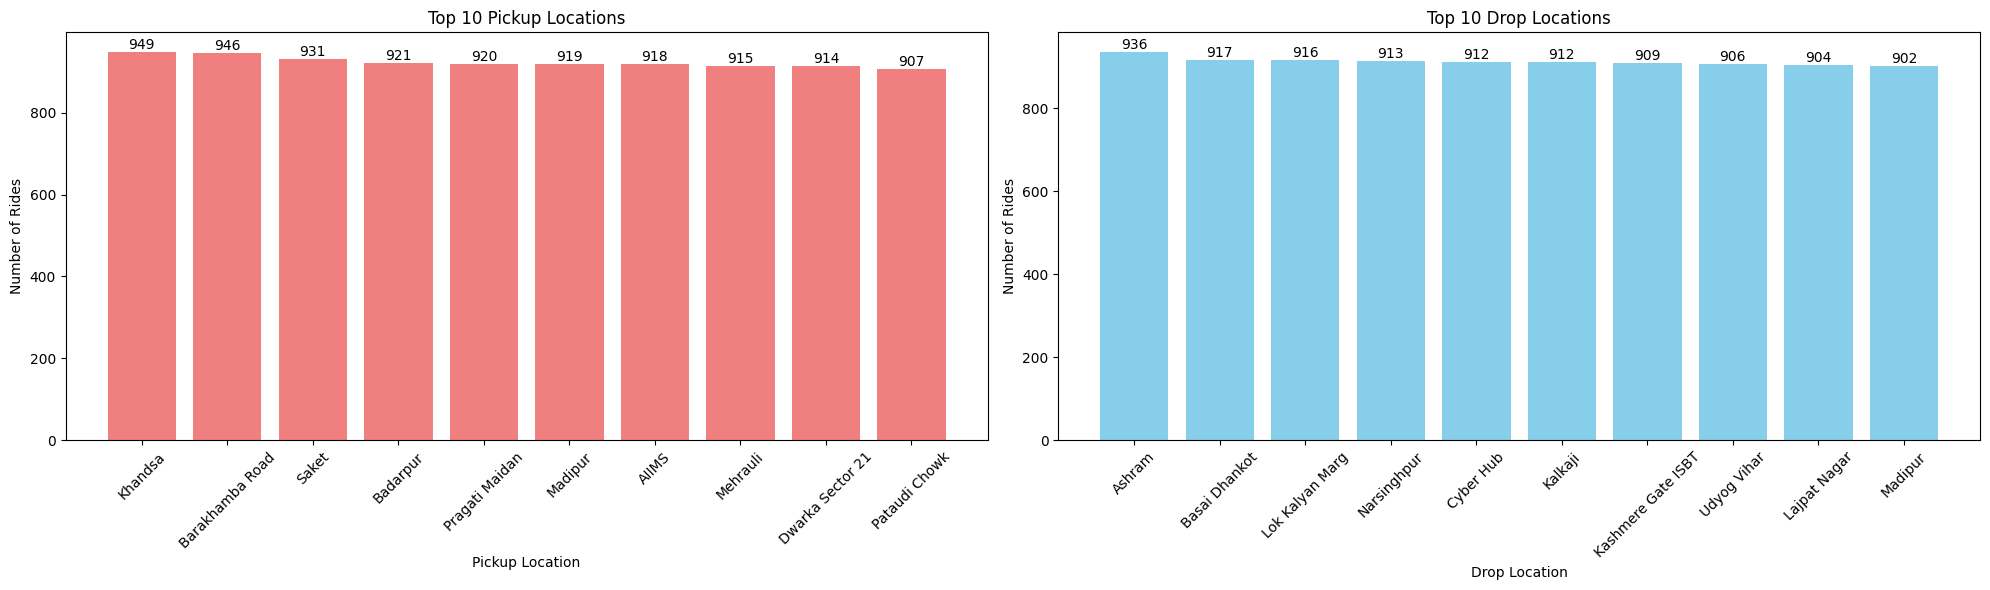

In [108]:
# Group and get counts
pickup_locations = df.groupby('Pickup Location').size().reset_index(name='Number of rides')
drop_locations = df.groupby('Drop Location').size().reset_index(name='Number of rides')

# Take top 10 only
pickup_locations = pickup_locations.nlargest(10, 'Number of rides')
drop_locations = drop_locations.nlargest(10, 'Number of rides')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- First plot: Top 10 Pickup Locations ---
bars1 = axes[0].bar(pickup_locations['Pickup Location'], pickup_locations['Number of rides'], color='lightcoral')
axes[0].set_title('Top 10 Pickup Locations')
axes[0].set_xlabel('Pickup Location')
axes[0].set_ylabel('Number of Rides')
axes[0].bar_label(bars1)
axes[0].tick_params(axis='x', rotation=45)  # Rotate labels for readability

# --- Second plot: Top 10 Drop Locations ---
bars2 = axes[1].bar(drop_locations['Drop Location'], drop_locations['Number of rides'], color='skyblue')
axes[1].set_title('Top 10 Drop Locations')
axes[1].set_xlabel('Drop Location')
axes[1].set_ylabel('Number of Rides')
axes[1].bar_label(bars2)
axes[1].tick_params(axis='x', rotation=45)

# Adjust spacing
plt.tight_layout()
plt.show()

# plt.tight_layout()
# It automatically adjusts spacing between: Subplots (fig, axes = plt.subplots(...)) , Axes titles, Labels, Tick labels
# so that nothing overlaps and everything fits neatly within the figure area.

Khandasa (949 rides) is the busiest pickup zone, while Ashram (936 rides) is the busiest drop-off zone, indicating a high volume of travel activity across these major city areas.

## 2. Booking Status & Cancellations

#### Distribution of Completed, Cancelled (Customer vs Driver), Incomplete rides.

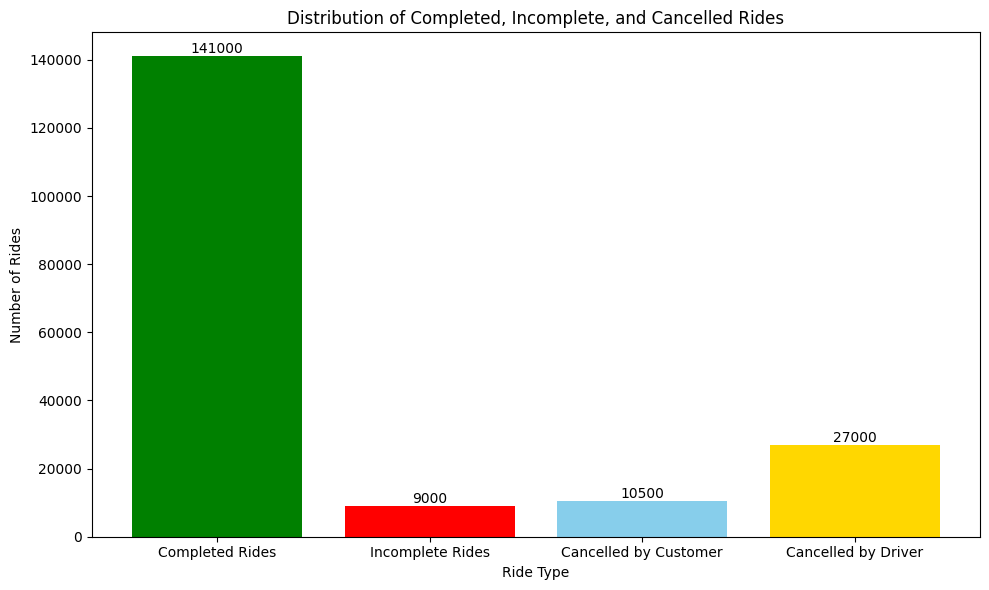

In [140]:
def get_status(status):
    if  status== 0:
        return 'Completed Rides'
    else:
        return 'Incomplete Rides'

def getstatus(status):
    if  status== 1:
        return 'Cancelled'

df['Ride Status'] = df['Incomplete Rides'].apply(get_status)

completion_status = df.groupby('Ride Status').size().reset_index(name = 'Number of Rides')
completion_status

df['Customer Cancellation Status'] = df['Cancelled Rides by Customer'].apply(getstatus)

cancellation_status_customer = df.groupby('Customer Cancellation Status').size().reset_index(name = 'Number of Rides')
cancellation_status_customer

df['Driver Cancellation Status'] = df['Cancelled Rides by Driver'].apply(getstatus)

cancellation_status_driver = df.groupby('Driver Cancellation Status').size().reset_index(name = 'Number of Rides')
cancellation_status_driver



# --- Combine all categories manually ---
data = {
    'Ride Status': [
        'Completed Rides',
        'Incomplete Rides',
        'Cancelled by Customer',
        'Cancelled by Driver'
    ],
    'Number of Rides': [
        completion_status.loc[completion_status['Ride Status'] == 'Completed Rides', 'Number of Rides'].values[0],
        completion_status.loc[completion_status['Ride Status'] == 'Incomplete Rides', 'Number of Rides'].values[0],
        cancellation_status_customer['Number of Rides'].values[0] if not cancellation_status_customer.empty else 0,
        cancellation_status_driver['Number of Rides'].values[0] if not cancellation_status_driver.empty else 0
    ]
}

final_df = pd.DataFrame(data)

# --- Plot ---
plt.figure(figsize=(10,6))
colors = ['green', 'red', 'skyblue', 'gold']
bars = plt.bar(final_df['Ride Status'], final_df['Number of Rides'], color=colors)

plt.title("Distribution of Completed, Incomplete, and Cancelled Rides")
plt.xlabel("Ride Type")
plt.ylabel("Number of Rides")
plt.bar_label(bars)
plt.tight_layout()
plt.show()


The vast majority of rides are Completed Rides. The number of Cancelled by Driver rides is significantly higher than both Cancelled by Customer rides and Incomplete Rides, suggesting that driver-side cancellations are the main reason for unfulfilled bookings.

#### Reasons for cancellations : Main reasons behind lost rides.

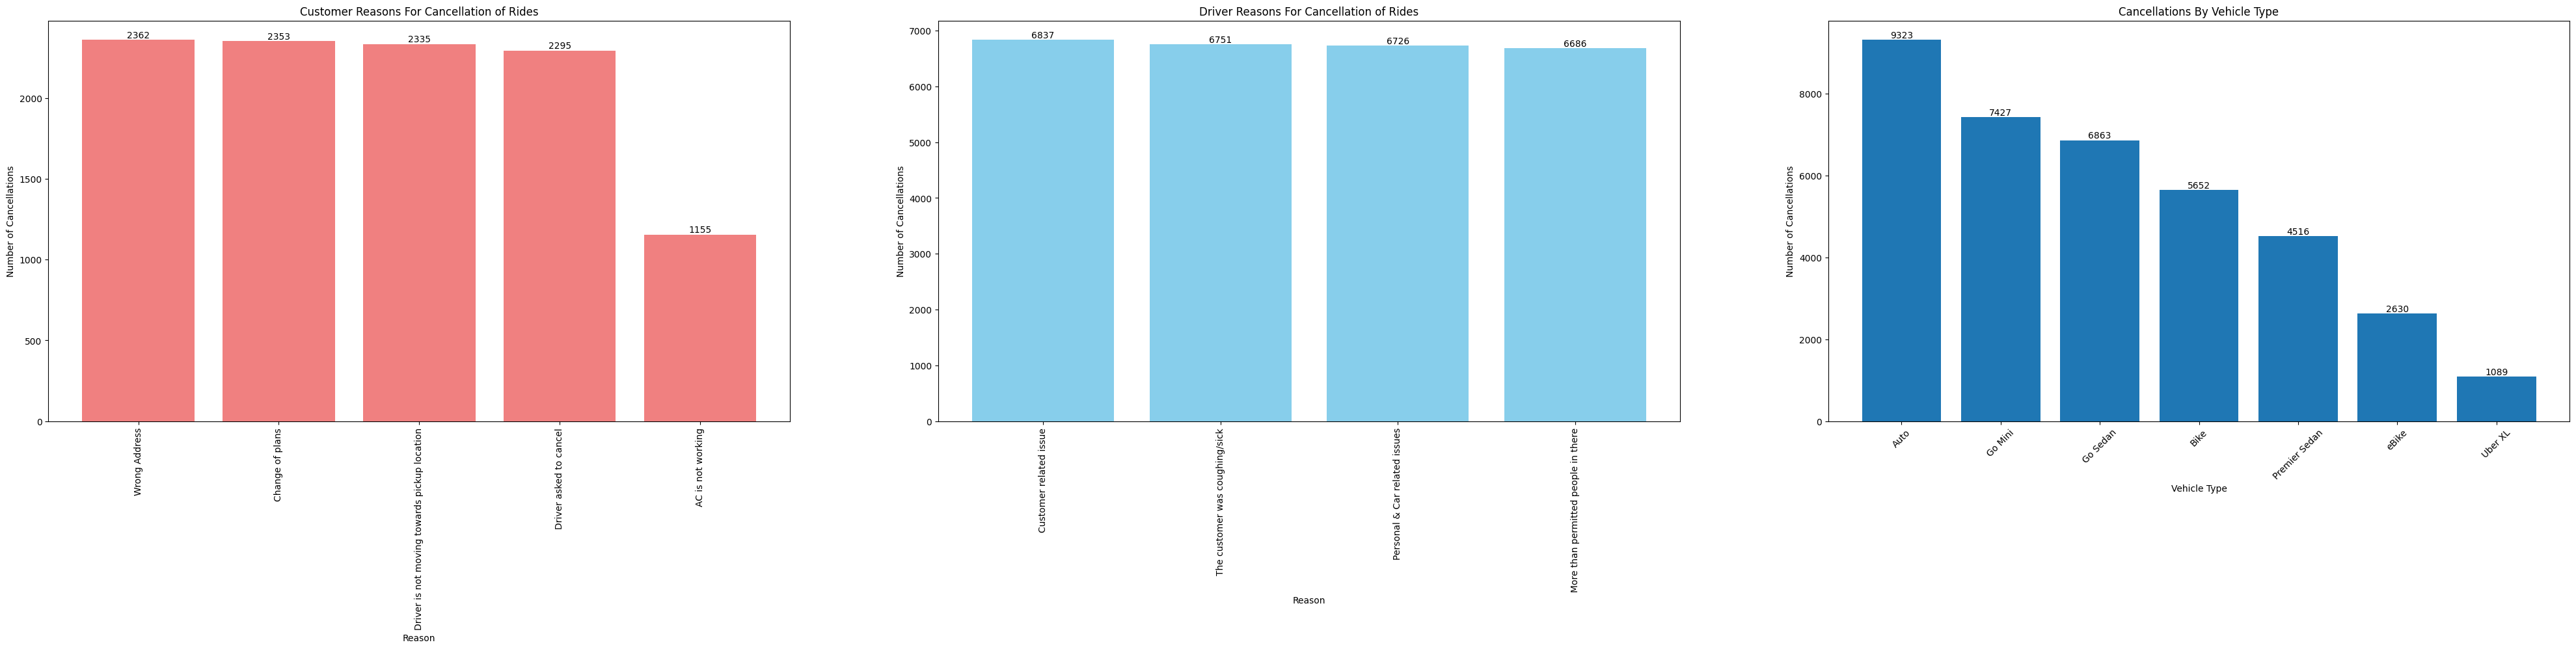

In [16]:
customer_reason = df.groupby('Reason for cancelling by Customer').size().reset_index(name = 'Total Count')
customer_reason = customer_reason[customer_reason['Reason for cancelling by Customer'] != 'Not Applicable']
customer_reason = customer_reason.sort_values(by='Total Count', ascending=False)

driver_reason = df.groupby('Driver Cancellation Reason').size().reset_index(name = 'Total Count')
driver_reason = driver_reason[driver_reason['Driver Cancellation Reason'] != 'Not Applicable']
driver_reason = driver_reason.sort_values(by='Total Count', ascending=False)

# --- Create Subplots ----
fig, axes = plt.subplots(1,3,figsize=(50,8)) 

# --- First Plot ---
bars1 = axes[0].bar(customer_reason['Reason for cancelling by Customer'], customer_reason['Total Count'], color='lightcoral')
axes[0].set_title('Customer Reasons For Cancellation of Rides')
axes[0].set_xlabel('Reason')
axes[0].set_ylabel('Number of Cancellations')
axes[0].bar_label(bars1)
axes[0].tick_params(axis='x', rotation=90)

# --- Second Plot ---
bars2 = axes[1].bar(driver_reason['Driver Cancellation Reason'], driver_reason['Total Count'], color='skyblue')
axes[1].set_title('Driver Reasons For Cancellation of Rides')
axes[1].set_xlabel('Reason')
axes[1].set_ylabel('Number of Cancellations')
axes[1].bar_label(bars2)
axes[1].tick_params(axis='x', rotation=90)

# --- Third Plot ----

# Filter customer and driver cancellations
cancelled_rides = df[(df['Booking Status'] == 'Cancelled by Customer') | (df['Booking Status'] == 'Cancelled by Driver')]
cancel_by_vehicle = cancelled_rides.groupby('Vehicle Type').size().reset_index(name='Number of Cancellations')
cancel_by_vehicle = cancel_by_vehicle.sort_values(by='Number of Cancellations', ascending=False)

bars3 = axes[2].bar(cancel_by_vehicle['Vehicle Type'], cancel_by_vehicle['Number of Cancellations'])
axes[2].set_title('Cancellations By Vehicle Type')
axes[2].set_xlabel('Vehicle Type')
axes[2].set_ylabel('Number of Cancellations')
axes[2].bar_label(bars3)
axes[2].tick_params(axis='x', rotation=45)

## 3. Revenue & Business Metrics

#### Total Booking Value Generated

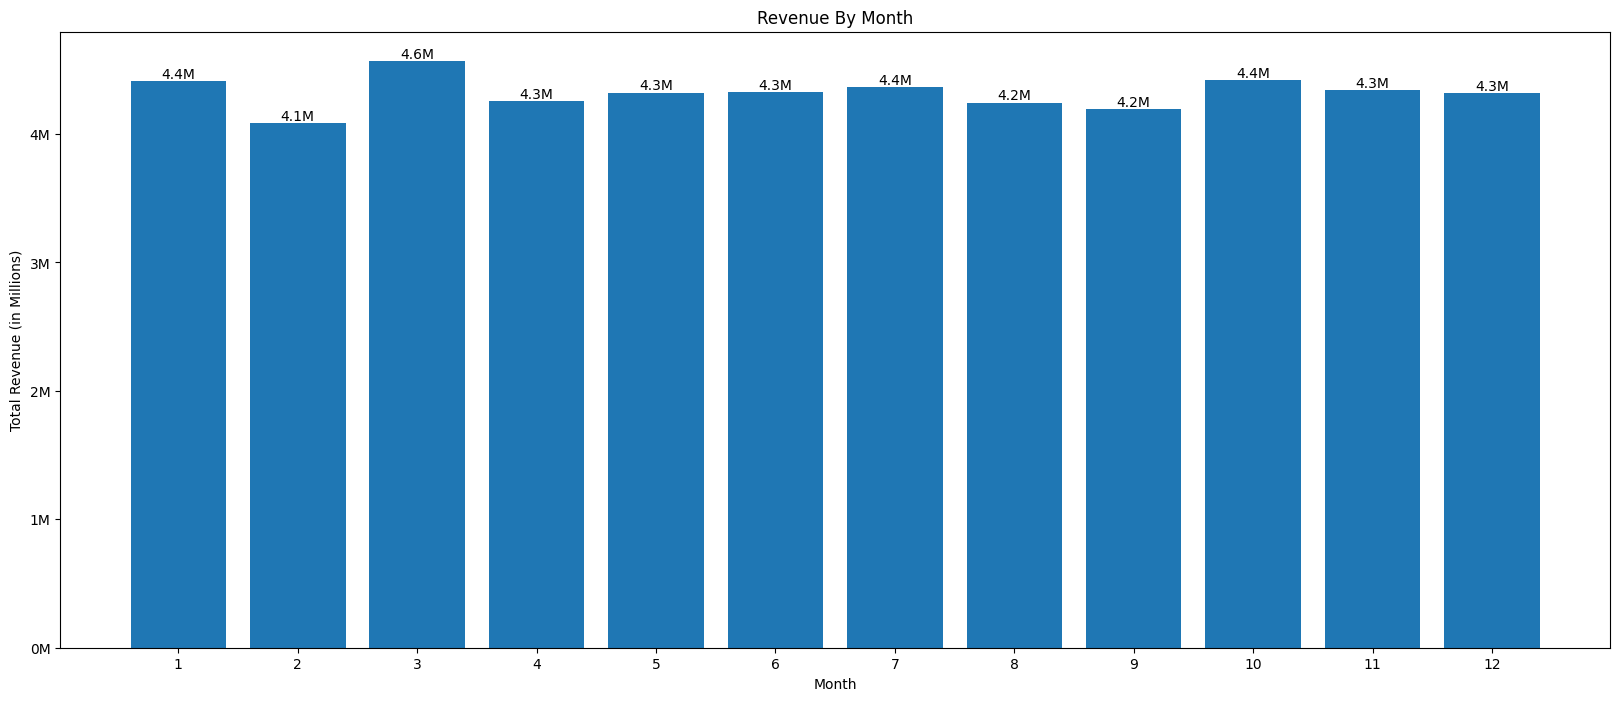

In [18]:
from matplotlib.ticker import FuncFormatter

# Sum of Booking Value by month
revenue = df.groupby('Month')['Booking Value'].sum().reset_index(name='Total Revenue')

plt.figure(figsize=(20,8))
bars = plt.bar(revenue['Month'], revenue['Total Revenue'])

# Add bar labels in Millions
plt.bar_label(bars, labels=[f"{val/1_000_000:.1f}M" for val in revenue['Total Revenue']])

plt.title('Revenue By Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue (in Millions)')
plt.xticks(revenue['Month'])

# Format y-axis ticks in Millions
formatter = FuncFormatter(lambda x, pos: f'{int(x/1_000_000)}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


Monthly revenue is highly consistent throughout the year, primarily fluctuating between 4.2 Million and 4.4 Million. The peak revenue of 4.6 Million was achieved in March, while February had the lowest revenue at 4.1 Million.

### Revenue by vehicle type and time of day.

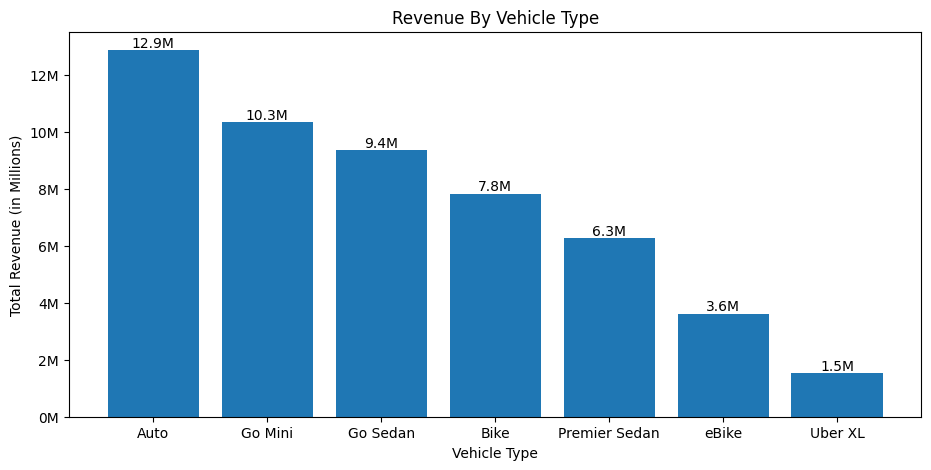

In [19]:
# Revenue by Vehicle Type
rbvt = df.groupby('Vehicle Type')['Booking Value'].sum().reset_index(name = 'Total Revenue')
rbvt = rbvt.sort_values(by='Total Revenue', ascending=False)

plt.figure(figsize=(11,5))

bars = plt.bar(rbvt['Vehicle Type'], rbvt['Total Revenue'])

# Add bar labels in Millions
plt.bar_label(bars, labels=[f"{val/1_000_000:.1f}M" for val in rbvt['Total Revenue']])

plt.title('Revenue By Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Revenue (in Millions)')
plt.xticks(rbvt['Vehicle Type'])

# Format y-axis ticks in Millions
formatter = FuncFormatter(lambda x, pos: f'{int(x/1_000_000)}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


Auto rides generate the highest revenue at 12.9 Million, significantly surpassing all other vehicle types. Revenue generally follows a decreasing trend from the smaller/basic car types down to the larger vehicle, with Bike and eBike options contributing mid-to-lower range revenues.

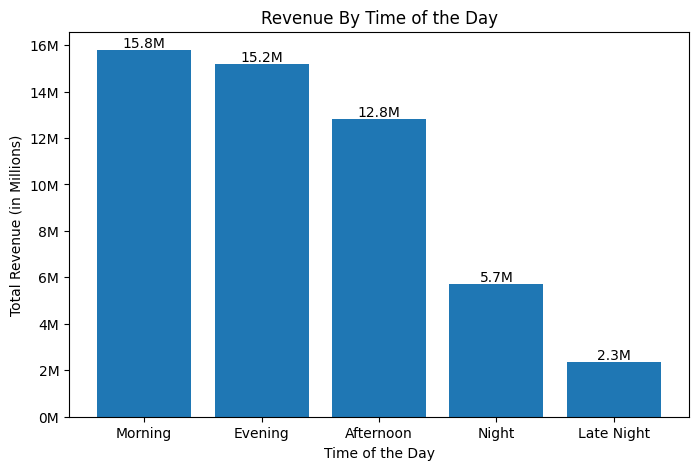

In [22]:
# Revenue by time of the day

rbtod = df.groupby('Time_of_Day')['Booking Value'].sum().reset_index(name = 'Total Revenue')
rbtod = rbtod.sort_values(by='Total Revenue', ascending=False)

plt.figure(figsize=(8,5))

bars = plt.bar(rbtod['Time_of_Day'], rbtod['Total Revenue'])

# Add bar labels in Millions
plt.bar_label(bars, labels=[f"{val/1_000_000:.1f}M" for val in rbtod['Total Revenue']])

plt.title('Revenue By Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Total Revenue (in Millions)')
plt.xticks(rbtod['Time_of_Day'])

# Format y-axis ticks in Millions
formatter = FuncFormatter(lambda x, pos: f'{int(x/1_000_000)}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


The highest revenue is generated during the Morning and Evening periods, which aligns with peak commute times. Revenue drops significantly during the Night and is lowest in the Late Night, indicating a strong correlation between revenue generation and daily business/work hours.

### Revenue by Payment Method

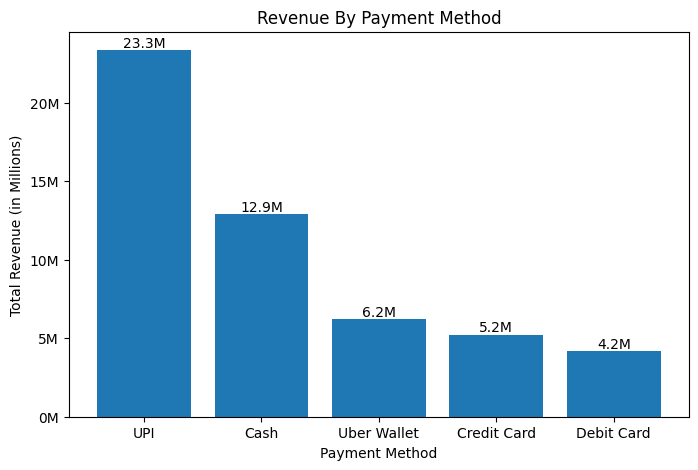

In [14]:
from matplotlib.ticker import FuncFormatter

rbpm = df.groupby('Payment Method')['Booking Value'].sum().reset_index(name = 'Total Revenue')
rbpm = rbpm[rbpm['Payment Method'] != 'Not Applicable']

rbpm = rbpm.sort_values(by='Total Revenue', ascending=False)

plt.figure(figsize=(8,5))

bars = plt.bar(rbpm['Payment Method'], rbpm['Total Revenue'])


# Add bar labels in Millions
plt.bar_label(bars, labels=[f"{val/1_000_000:.1f}M" for val in rbpm['Total Revenue']])

plt.title('Revenue By Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue (in Millions)')
plt.xticks(rbpm['Payment Method'])

# Format y-axis ticks in Millions
formatter = FuncFormatter(lambda x, pos: f'{int(x/1_000_000)}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

UPI is the dominant payment method, generating the highest revenue at 23.3 Million, significantly more than any other option. Cash is the second most popular method at 12.9 Million, while digital wallet and card payments (Uber Wallet, Credit Card, and Debit Card) contribute the lowest portions of the total revenue.

#### Customer and Driver ratings distribution.

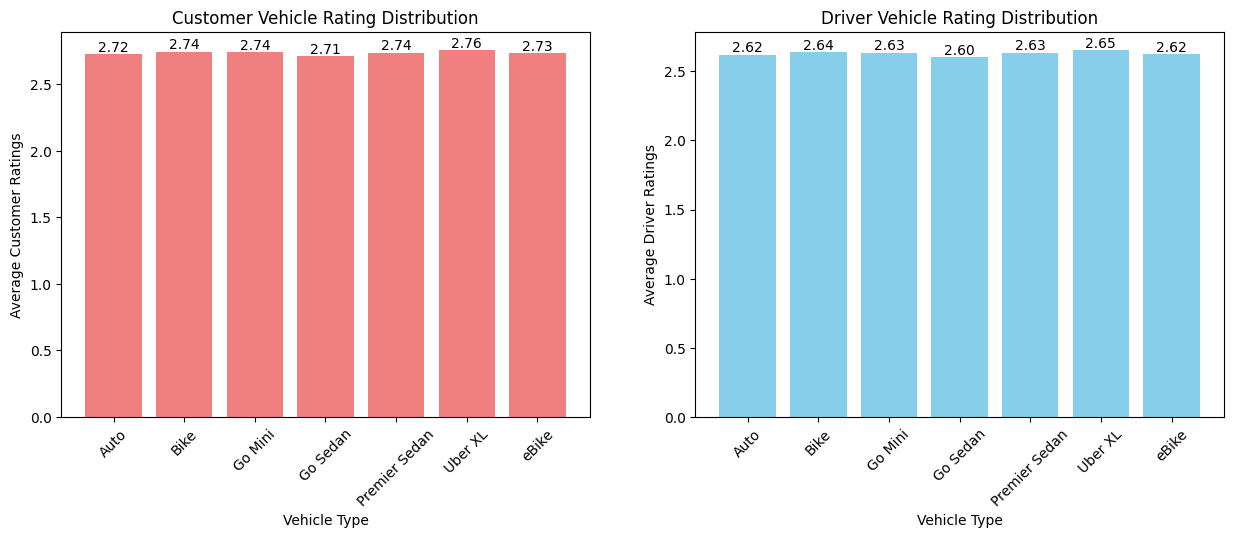

In [23]:
# Customer Vehicle Rating Distribution (cvrd)

cvrd = df.groupby('Vehicle Type')['Customer Rating'].mean().reset_index(name = 'Average Ratings')
cvrd

dvrd = df.groupby('Vehicle Type')['Driver Ratings'].mean().reset_index(name = 'Average Ratings')
dvrd

fig, axes = plt.subplots(1,2,figsize=(15,5))
bars1 = axes[0].bar(cvrd['Vehicle Type'], cvrd['Average Ratings'], color = 'lightcoral')
axes[0].set_title('Customer Vehicle Rating Distribution')
axes[0].set_xlabel('Vehicle Type')
axes[0].set_ylabel('Average Customer Ratings')
axes[0].bar_label(bars1, labels=[f"{val:.2f}" for val in cvrd['Average Ratings']])
axes[0].tick_params(axis='x', rotation=45)

bars2 = axes[1].bar(dvrd['Vehicle Type'], dvrd['Average Ratings'], color = 'skyblue'  )
axes[1].set_title('Driver Vehicle Rating Distribution')
axes[1].set_xlabel('Vehicle Type')
axes[1].set_ylabel('Average Driver Ratings')
axes[1].bar_label(bars2, labels=[f"{val:.2f}" for val in dvrd['Average Ratings']])
axes[1].tick_params(axis='x', rotation=45)

Both customer and driver average vehicle ratings are critically low, consistently falling in the 2.60 to 2.76 range (out of a likely 5-point scale). This indicates a poor quality perception of the vehicles across the entire fleet, affecting both the riders and the drivers.

### Top 5 Customers

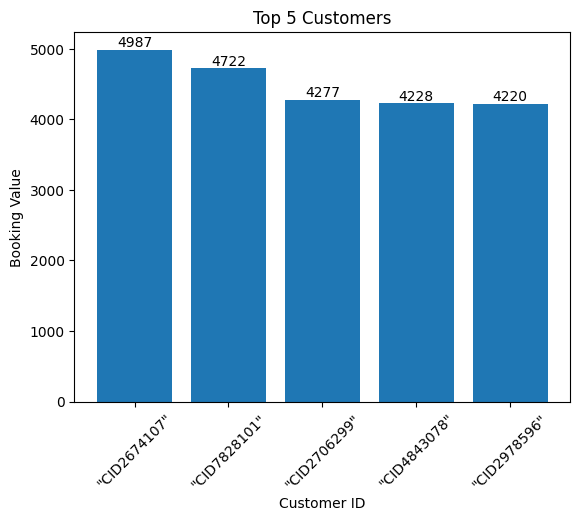

In [52]:
top_customers = df.groupby('Customer ID')['Booking Value'].sum().reset_index(name = 'Sum of Booking Value')
top_customers = top_customers.sort_values(by='Sum of Booking Value', ascending = False)
top_customers = top_customers.head(5)

bars = plt.bar(top_customers['Customer ID'], top_customers['Sum of Booking Value'])
plt.title('Top 5 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Booking Value')
plt.bar_label(bars)
plt.xticks(rotation = 45)
plt.show()

### Average ride distance by vehicle type.

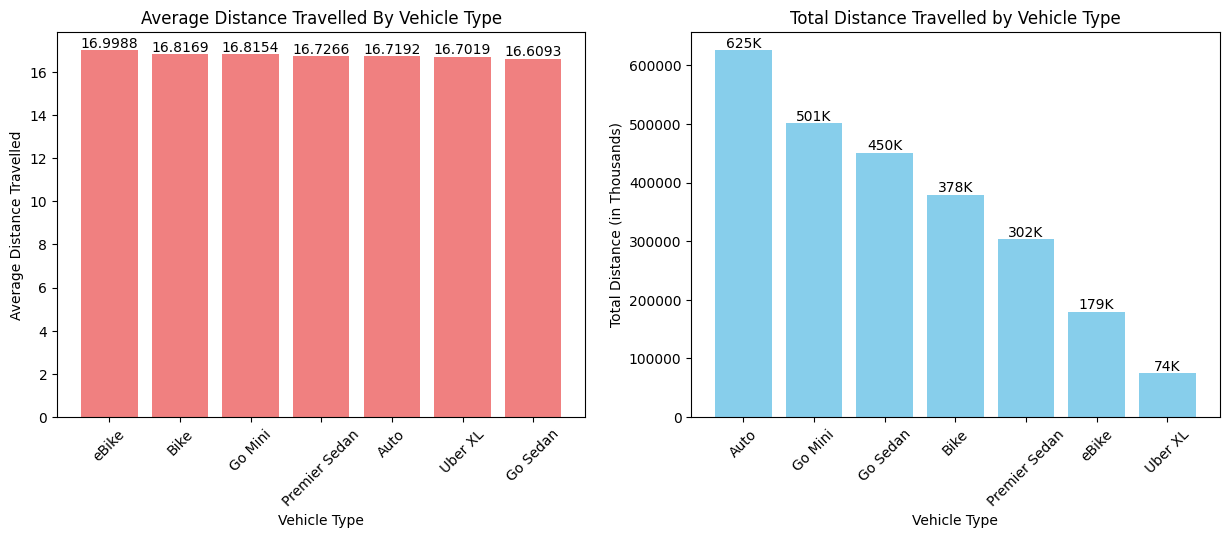

In [71]:
# Average Distance travelled (ADT)
adt = df.groupby('Vehicle Type')['Ride Distance'].mean().reset_index(name = 'Avg Distance Travelled')
adt = adt.sort_values(by='Avg Distance Travelled', ascending=False)

# Total Distance Travelled (TDT)
tdt = df.groupby('Vehicle Type')['Ride Distance'].sum().reset_index(name='Total Distance Travelled')
tdt = tdt.sort_values(by='Total Distance Travelled', ascending=False)

fig, axes = plt.subplots(1,2,figsize=(15,5))
bars1 = axes[0].bar(adt['Vehicle Type'], adt['Avg Distance Travelled'], color = 'lightcoral')
axes[0].set_title('Average Distance Travelled By Vehicle Type')
axes[0].set_xlabel('Vehicle Type')
axes[0].set_ylabel('Average Distance Travelled')
axes[0].bar_label(bars1)
axes[0].tick_params(axis='x', rotation=45)

bars2 = axes[1].bar(tdt['Vehicle Type'], tdt['Total Distance Travelled'], color = 'skyblue')
axes[1].set_title('Total Distance Travelled by Vehicle Type')
axes[1].set_xlabel('Vehicle Type')
axes[1].set_ylabel('Total Distance (in Thousands)')
axes[1].bar_label(bars2, labels=[f"{int(val/1_000)}K" for val in tdt['Total Distance Travelled']])
axes[1].tick_params(axis='x', rotation=45)

While the average distance per ride is extremely consistent across all vehicle types (ranging narrowly from 16.60 to 16.99), the total distance travelled is dominated by Auto and Go Mini rides. This indicates that Auto is the most frequently used vehicle type, accumulating the highest total distance despite having a similar average trip length to all other options.

### Summary
Based on the comprehensive analysis, the business demonstrates stable monthly revenue driven primarily by high-demand weekday and commute-time (Morning/Evening) rides, with Auto being the most popular vehicle type and UPI the dominant payment method. The major issues to address are the critically low average vehicle ratings from both customers and drivers, and the high volume of driver-initiated ride cancellations.